In [1]:
# IMPORTING MOLDULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the metro.csv file into a pandas data frame.

### Convert the start_time and end_time columns to date objects if they are not already.

In [2]:
#  READING CSV FILE IN PANDAS DATAFRAME WHERE DATE ARE CONVERTED TO DATE TYPE

mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dataset = pd.read_csv("metro.csv",parse_dates=['start_time', 'end_time'], date_parser=mydateparser)
dataset.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,34.035801,-118.233170,3082,34.046520,-118.237411,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,34.145248,-118.150070,4174,34.165291,-118.150970,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,33.779819,-118.263023,3013,33.779819,-118.263023,12055,1,Round Trip,Walk-up


In [4]:
# GETTING ROWS AND COLUMNS
rows = dataset.shape[0]
cols = dataset.shape[1]
print("Dataset has {} Number of Rows and {} Number of Columns".format(rows,cols))

Dataset has 95283 Number of Rows and 14 Number of Columns


In [5]:
# DISPLAYING DATA TYPE OF COLUMNS
# HERE 'object' DTYPE IS SHOWN AS CHARACTER DATA TYPE ELSE EITHER int64 OR float64.

tbl_dataformat = []
for c in dataset.columns:
    tbl_dataformat.append([c,'Character' if dataset[c].dtype == 'object' else dataset[c].dtype])
print('Original features datatypes \n')      
tbl_dataformat = pd.DataFrame(tbl_dataformat,columns=['Feature','Data type'])
print(tbl_dataformat)

Original features datatypes 

                Feature       Data type
0               trip_id           int64
1              duration           int64
2            start_time  datetime64[ns]
3              end_time  datetime64[ns]
4         start_station           int64
5             start_lat         float64
6             start_lon         float64
7           end_station           int64
8               end_lat         float64
9               end_lon         float64
10              bike_id           int64
11        plan_duration           int64
12  trip_route_category       Character
13      passholder_type       Character


In [6]:
# DISPLAYING VALUE COUNT FOR CATEGORICAL COLUMNS IN DATASET

for column_name in dataset.select_dtypes(exclude=['datetime64[ns]','int64','float64']).columns:
  print('\n Feature:{0} '.format(column_name))
  print(dataset[column_name].value_counts())


 Feature:trip_route_category 
One Way       76944
Round Trip    18339
Name: trip_route_category, dtype: int64

 Feature:passholder_type 
Walk-up         44990
Monthly Pass    43967
One Day Pass     4737
Flex Pass        1577
Annual Pass        12
Name: passholder_type, dtype: int64


## Find a sensible way to remove the missing values from the data frame, and explain why you have chosen this method

In [7]:
# CHECKING THE NUMBER OF NA VALUES IN EACH COLUMN IN DATASET
# ONLY FOUR COLUNS CONTAIN NA VALUES

dataset.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat               559
start_lon               559
end_station               0
end_lat                1838
end_lon                1838
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

In [8]:
# CHECKING THE RELATION BETWEEN 'start_station' and ('start_lat','start_lon') COLUMNS
# WE FOUND THAT FOR EACH DIFFERENT START STATION, LATITUDE AND LONGITUDE IS ALWAYS SAME.
# SAME APPLIES WITH THE END STATION LATITUDE AND LONGITUDE WITH END STATION
# THUS WE CAN EITHER DROP ALL 4 COLUMNS WHICH CONTAINS NA VALUE OR WE CAN FILL NA VALUES WITH THE OBSERVATION FOUND

data = dataset[dataset.start_station == 4157]
data.head(100)

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,34.140999,-118.132088,4162,34.147499,-118.148010,6115,30,One Way,Monthly Pass
383,94951975,5,2018-07-01 15:28:00,2018-07-01 15:33:00,4157,34.140999,-118.132088,4176,34.137859,-118.122414,5962,30,One Way,Monthly Pass
546,94973425,7,2018-07-01 18:32:00,2018-07-01 18:39:00,4157,34.140999,-118.132088,4177,34.144981,-118.138260,5812,30,One Way,Monthly Pass
649,94988035,27,2018-07-01 20:20:00,2018-07-01 20:47:00,4157,34.140999,-118.132088,4174,34.165291,-118.150970,6029,30,One Way,Monthly Pass
687,94995435,13,2018-07-01 21:30:00,2018-07-01 21:43:00,4157,34.140999,-118.132088,4157,34.140999,-118.132088,6602,1,Round Trip,Walk-up
1476,95167033,6,2018-07-02 22:18:00,2018-07-02 22:24:00,4157,34.140999,-118.132088,4157,34.140999,-118.132088,6358,1,Round Trip,Walk-up
1482,95167026,6,2018-07-02 22:39:00,2018-07-02 22:45:00,4157,34.140999,-118.132088,4176,34.137859,-118.122414,5731,30,One Way,Monthly Pass
2203,95293629,7,2018-07-03 18:37:00,2018-07-03 18:44:00,4157,34.140999,-118.132088,4163,34.150471,-118.132019,5824,30,One Way,Monthly Pass
2230,95301139,11,2018-07-03 19:08:00,2018-07-03 19:19:00,4157,34.140999,-118.132088,4166,34.145908,-118.121750,12340,1,One Way,Walk-up
2234,95301137,9,2018-07-03 19:10:00,2018-07-03 19:19:00,4157,34.140999,-118.132088,4166,34.145908,-118.121750,12083,1,One Way,Walk-up


In [9]:
# DROPPING THE 4 LONGITUDE AND LATITUDE COLUMNS FROM DATASET

dataset = dataset.drop(['start_lat','start_lon','end_lat','end_lon'],axis=1)
dataset.head()

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,3082,6279,30,One Way,Monthly Pass
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,3082,6518,365,One Way,Flex Pass
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,4174,4823,365,One Way,Monthly Pass
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,4162,6115,30,One Way,Monthly Pass
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,3013,12055,1,Round Trip,Walk-up


In [10]:
# CHECKING THE NUMBER OF NA VALUES IN EACH COLUMN IN DATASET
# NO NA VALUE FOUND IN REMAINING COLUMNS

dataset.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
end_station            0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
dtype: int64

## Explore the distribution of the duration variable. You should produce a plot visualising the distribution, and calculate and discuss briefly statistics of the variable.

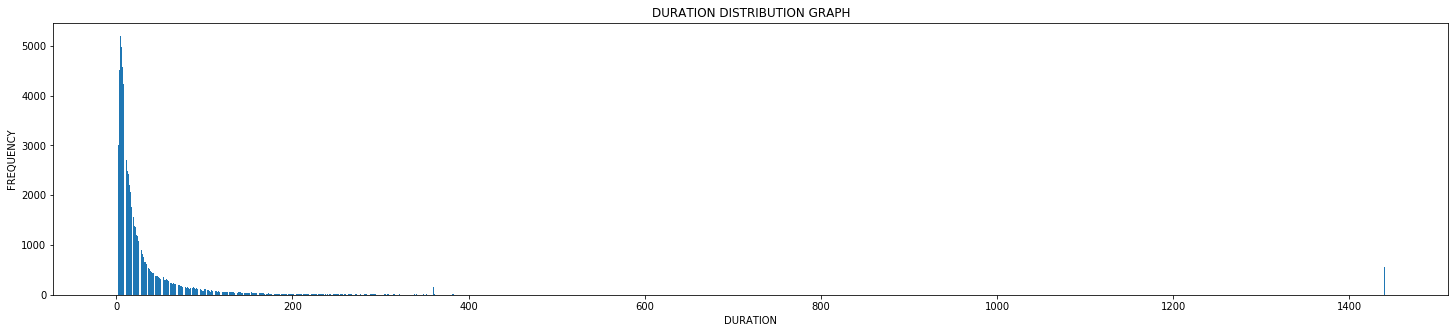

In [11]:
# PLOT SHOWING THE DISTRIBUTION OF DURATION VARIABLE

# DISCUSSION ON GRAPH
# AS WE CAN SEE THERE ARE HIGHER FREQUENCY FOR LOWER DURATION
# WE CAN ALSO SEE A SPIKE IN THE END OF THE GRAPH
duration_distribution = dataset.duration.value_counts().reset_index().sort_values(["index"],ascending=True).reset_index(drop=True)
plt.figure(figsize=(25,5))
plt.bar(duration_distribution['index'],duration_distribution['duration'])
plt.title("DURATION DISTRIBUTION GRAPH")
plt.xlabel("DURATION")
plt.ylabel("FREQUENCY")
plt.show()

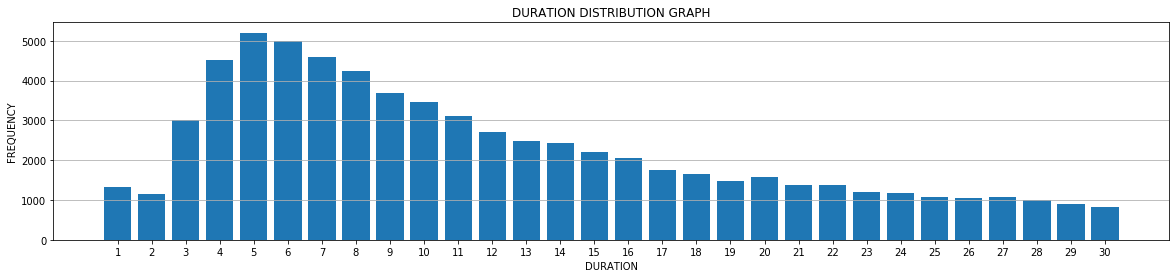

In [12]:
# THIS PLOT SHOW THE TOP 30 ROWS OF THE DURATION DISTRIBUTION GRAPH
# THIS CLEARLY SHOWS THAT DURATION 5 HAS MAXIMUM FREQUENCY
# THUS WE CAN CONCLUDE THAT DURATION OF 5 IS MOST COMMON DURATION
# MAJORITY DISTRIBUTION IS HOLD BY RANGE ( 1 - 30 ) DURATION.

length = 30
plt.figure(figsize=(20,4))
plt.bar(duration_distribution['index'][:length],duration_distribution['duration'][:length])
plt.title("DURATION DISTRIBUTION GRAPH")
plt.xlabel("DURATION")
plt.xticks(duration_distribution['index'][:length])
plt.ylabel("FREQUENCY")
plt.grid( axis='y')
plt.show()

## Produce a plot showing how the distribution of duration relates to passholder type.

In [13]:
counting = dataset.groupby(["duration","passholder_type"]).count().reset_index()
counting["count"] = counting["trip_id"]
counting = counting[["duration","passholder_type","count"]]
counting

,duration,passholder_type,count
0,1,Flex Pass,18
1,1,Monthly Pass,782
2,1,One Day Pass,65
3,1,Walk-up,460
4,2,Flex Pass,22
5,2,Monthly Pass,934
6,2,One Day Pass,25
7,2,Walk-up,165
8,3,Annual Pass,1
9,3,Flex Pass,114


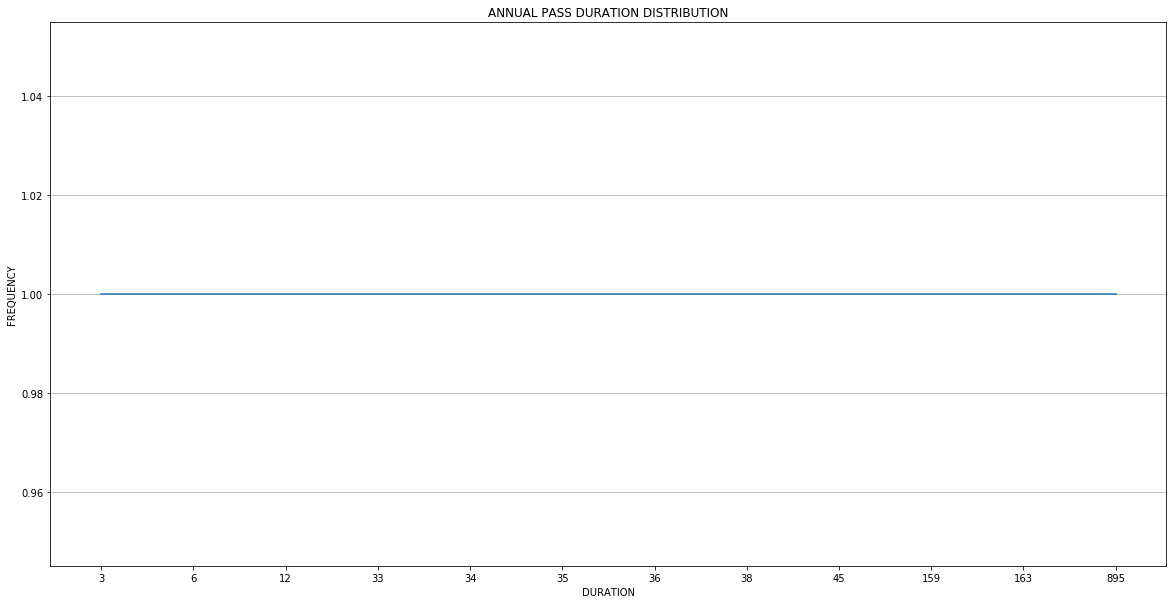

In [14]:
data = counting[counting["passholder_type"] == "Annual Pass"]
length = len(data)
plt.figure(figsize=(20,10))
plt.plot([x for x in range(0,length)],data['count'])
plt.xticks([x for x in range(0,length)],labels=data['duration'])
plt.xlabel("DURATION")
plt.ylabel("FREQUENCY")
plt.title("ANNUAL PASS DURATION DISTRIBUTION")
plt.grid(axis="y")
plt.show()

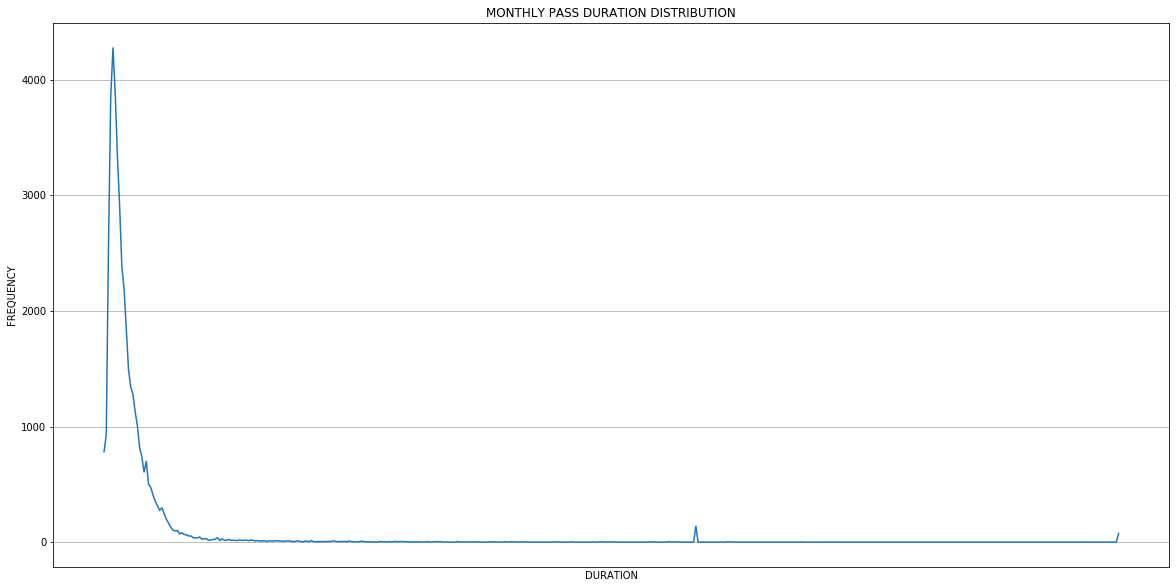

In [15]:
data = counting[counting["passholder_type"] == "Monthly Pass"]
length = len(data)
plt.figure(figsize=(20,10))
plt.plot([x for x in range(0,length)],data['count'])
plt.xticks([x for x in range(0,length)],labels=data['duration'])
plt.xlabel("DURATION")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY PASS DURATION DISTRIBUTION")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid(axis="y")
plt.show()

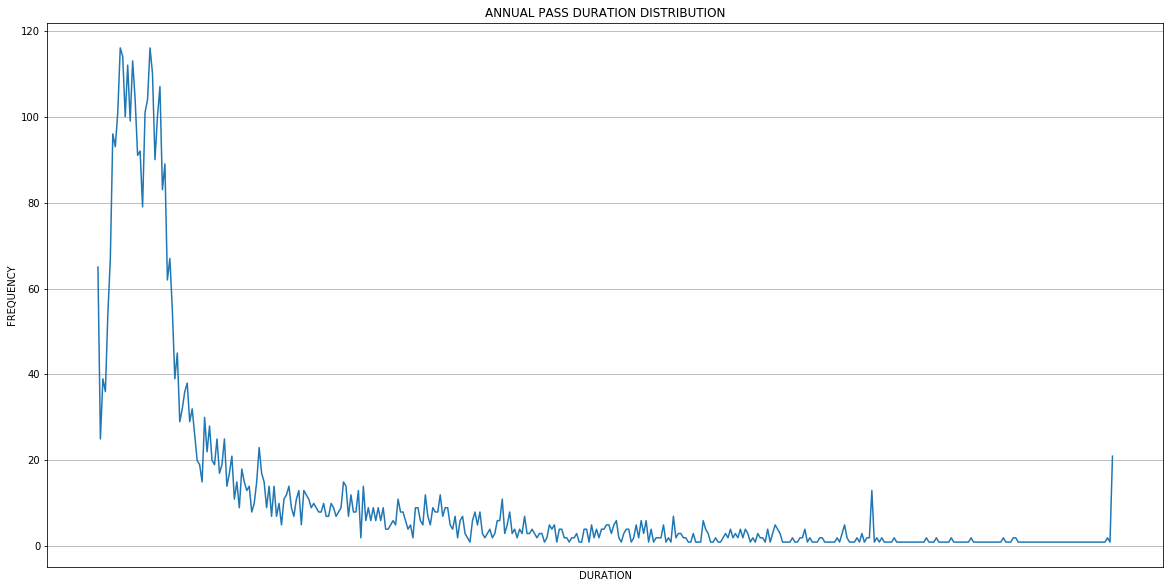

In [16]:
data = counting[counting["passholder_type"] == "One Day Pass"]
length = len(data)
plt.figure(figsize=(20,10))
plt.plot([x for x in range(0,length)],data['count'])
plt.xticks([x for x in range(0,length)],labels=data['duration'])
plt.xlabel("DURATION")
plt.ylabel("FREQUENCY")
plt.title("ANNUAL PASS DURATION DISTRIBUTION")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid(axis="y")
plt.show()

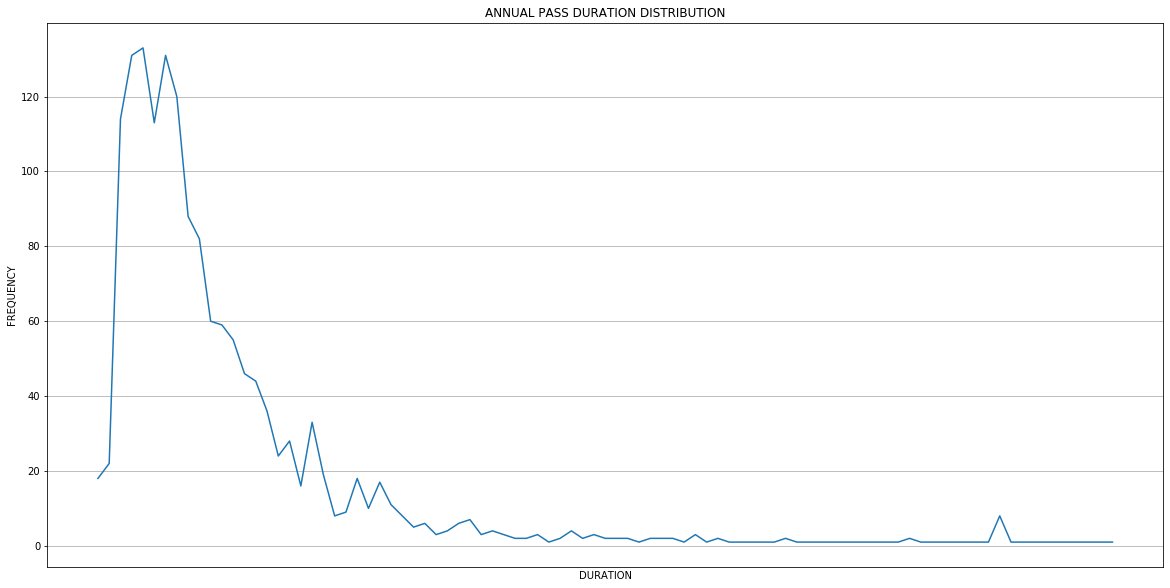

In [17]:
data = counting[counting["passholder_type"] == "Flex Pass"]
length = len(data)
plt.figure(figsize=(20,10))
plt.plot([x for x in range(0,length)],data['count'])
plt.xticks([x for x in range(0,length)],labels=data['duration'])
plt.xlabel("DURATION")
plt.ylabel("FREQUENCY")
plt.title("ANNUAL PASS DURATION DISTRIBUTION")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid(axis="y")
plt.show()

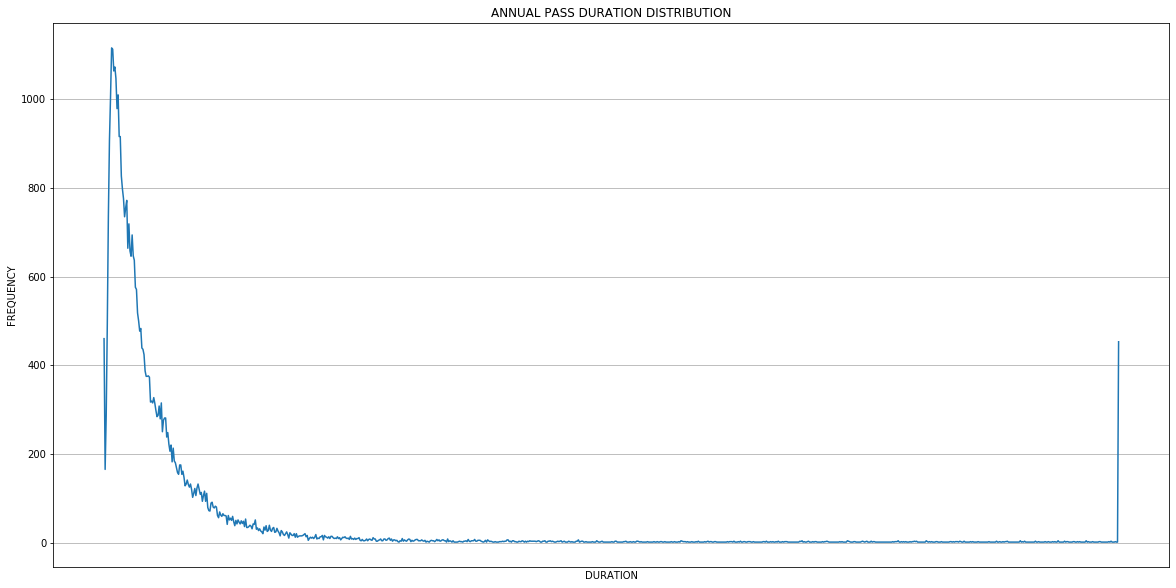

In [18]:
data = counting[counting["passholder_type"] == "Walk-up"]
length = len(data)
plt.figure(figsize=(20,10))
plt.plot([x for x in range(0,length)],data['count'])
plt.xticks([x for x in range(0,length)],labels=data['duration'])
plt.xlabel("DURATION")
plt.ylabel("FREQUENCY")
plt.title("ANNUAL PASS DURATION DISTRIBUTION")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.grid(axis="y")
plt.show()

## Perform an appropriate statistical test to check if the mean duration is different between One Day Pass and Flex Pass passholders. 

In [19]:
# GROUPING THE DATASET BY 'passholde_type'
# APPLYING MEAN AND MIN FUNCTIONS TO GET AVERAGE AND MNIMUM FROM DURATION COLUMN

# mean_data CONTAINS TWO COLUMNS AFTER reset_index, i.e. "passholder_type" AND "duration"
# WHERE "duration" COLUMN CONTAINS MEAN VALUE FOR EACH PASSHOLDER TYPE.
# SIMILARLY min_data CONTAINS MINIMUM DURATION FOR EACH PASSHOLDER TYPE.

mean_data = dataset.groupby(["passholder_type"]).mean()['duration'].reset_index()
min_data = dataset.groupby(["passholder_type"]).min()['duration'].reset_index()
mean_data

,passholder_type,duration
0,Annual Pass,121.583333
1,Flex Pass,20.091313
2,Monthly Pass,20.094048
3,One Day Pass,76.227781
4,Walk-up,73.932874


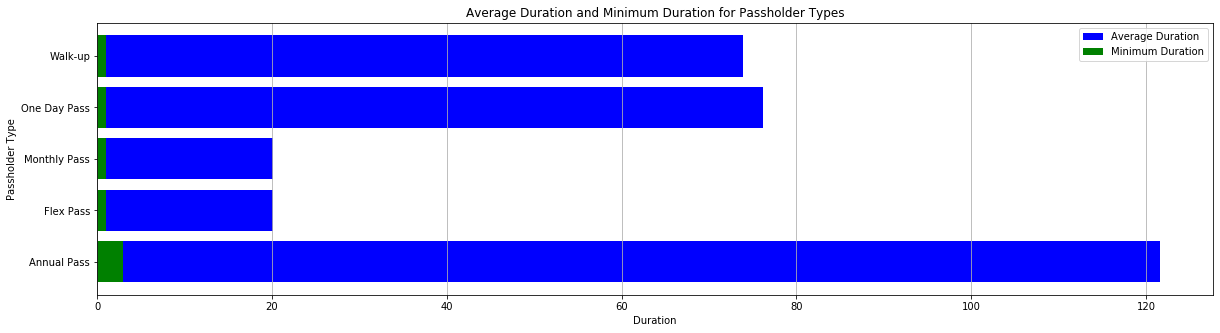

In [20]:
# PLOTTING THE AVERAGE AND MINIMUM DURATION FOR EACH PASSHOLDER TYPE
# ON THE PLOT BOTH "Flex Pass" and "One Day Pass" IT IS VISUALLY CLEAR
# THAT AVEARAGE DURATION FOR ONE DAY PASS IS MUCH GREATE THAN FLEX PASS

X = [x for x in range(len(mean_data))]
plt.figure(figsize=(20,5))
plt.barh(X,mean_data['duration'],color='blue')
plt.barh(X,min_data['duration'],color='green')
plt.yticks(X,labels=mean_data['passholder_type'])
plt.xlabel("Duration")
plt.ylabel("Passholder Type")
plt.title("Average Duration and Minimum Duration for Passholder Types")
plt.legend(["Average Duration","Minimum Duration"])
plt.grid( axis='x')
plt.show()

## Create a new column in the data frame that gives the hour of the day that each journey started on.

In [21]:
dataset["start_hour"] = dataset["start_time"].dt.hour

## Explore how the duration variable varies between each journey starting hour of the day, creating a plot to visualise this.

In [22]:
hour_duration_relation = dataset[["duration","start_hour"]].groupby(["start_hour"]).mean().reset_index()
hour_duration_relation

,start_hour,duration
0,0,73.246226
1,1,91.114641
2,2,91.562327
3,3,88.400000
4,4,71.160804
5,5,39.202105
6,6,36.258729
7,7,28.500512
8,8,29.090413
9,9,45.781750


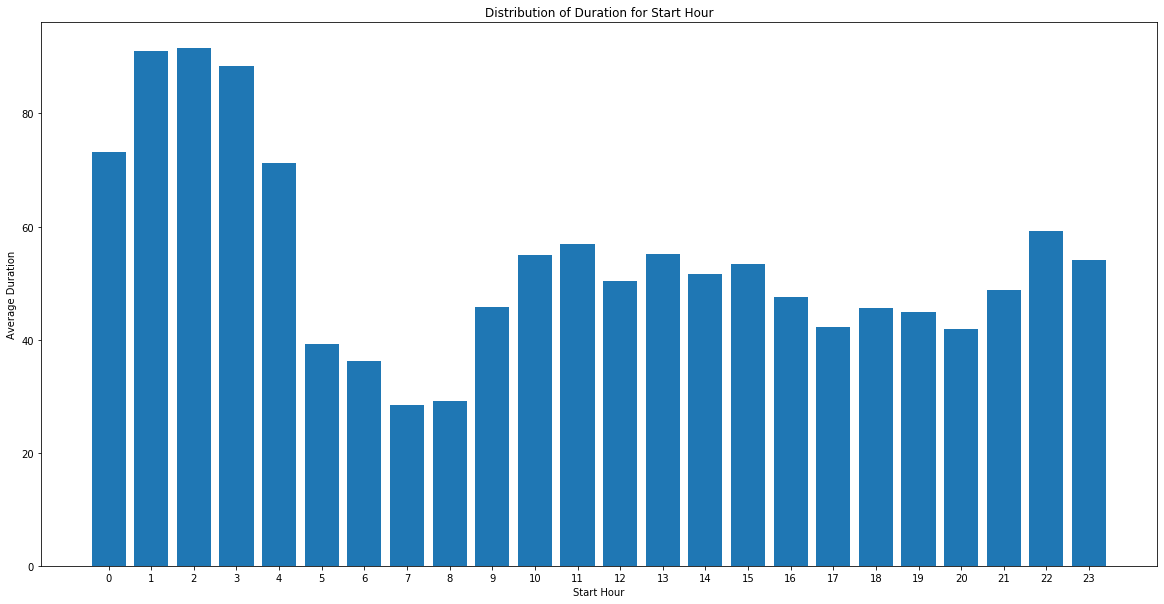

In [23]:
plt.figure(figsize=(20,10))
plt.bar(hour_duration_relation["start_hour"],hour_duration_relation["duration"])
plt.xlabel("Start Hour")
plt.ylabel("Average Duration")
plt.xticks(hour_duration_relation["start_hour"])
plt.title("Distribution of Duration for Start Hour")
plt.show()

In [24]:
hour_duration_count = dataset[["duration","start_hour"]].groupby(["start_hour"]).count().reset_index()
hour_duration_count

,start_hour,duration
0,0,1060
1,1,724
2,2,361
3,3,165
4,4,199
5,5,475
6,6,1117
7,7,2927
8,8,4767
9,9,4559


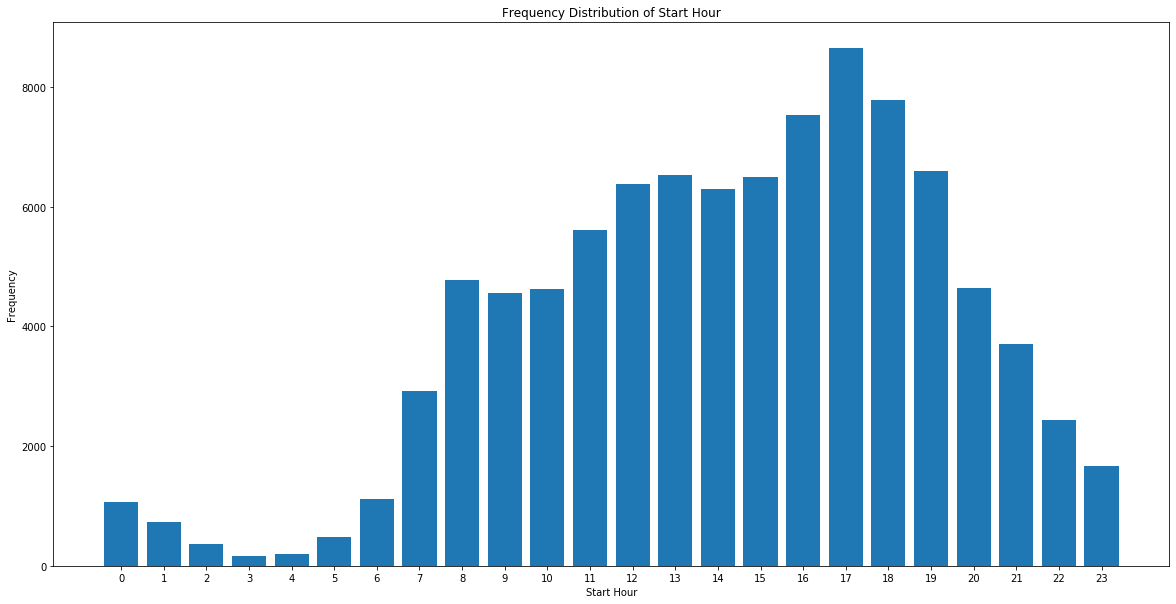

In [25]:
plt.figure(figsize=(20,10))
plt.bar(hour_duration_count["start_hour"],hour_duration_count["duration"])
plt.xlabel("Start Hour")
plt.ylabel("Frequency")
plt.xticks(hour_duration_count["start_hour"])
plt.title("Frequency Distribution of Start Hour")
plt.show()

## Explore how the distribution of the duration variable varies between each day of the week, creating a plot to visualise this.

In [26]:
dataset["start_week_day"] = dataset["start_time"].dt.dayofweek
dataset

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,start_hour,start_week_day
0,94851140,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,3082,6279,30,One Way,Monthly Pass,0,6
1,94851141,8,2018-07-01 00:04:00,2018-07-01 00:12:00,3058,3082,6518,365,One Way,Flex Pass,0,6
2,94851138,15,2018-07-01 00:09:00,2018-07-01 00:24:00,4147,4174,4823,365,One Way,Monthly Pass,0,6
3,94851137,7,2018-07-01 00:22:00,2018-07-01 00:29:00,4157,4162,6115,30,One Way,Monthly Pass,0,6
4,94851136,35,2018-07-01 00:23:00,2018-07-01 00:58:00,3013,3013,12055,1,Round Trip,Walk-up,0,6
5,94851135,6,2018-07-01 00:38:00,2018-07-01 00:44:00,3029,3082,6370,1,One Way,Walk-up,0,6
6,94851134,5,2018-07-01 00:39:00,2018-07-01 00:44:00,3029,3082,6566,1,One Way,Walk-up,0,6
7,94857739,33,2018-07-01 00:40:00,2018-07-01 01:13:00,3069,3075,6407,1,One Way,Walk-up,0,6
8,94851133,6,2018-07-01 00:44:00,2018-07-01 00:50:00,3067,3062,5859,30,One Way,Monthly Pass,0,6
9,94851132,3,2018-07-01 00:46:00,2018-07-01 00:49:00,3034,3074,6562,30,One Way,Monthly Pass,0,6


In [27]:
week_duration_count = dataset[["duration","start_week_day"]].groupby(["start_week_day"]).count().reset_index()
week_duration_count

,start_week_day,duration
0,0,12944
1,1,13093
2,2,13115
3,3,13380
4,4,13804
5,5,13670
6,6,15277


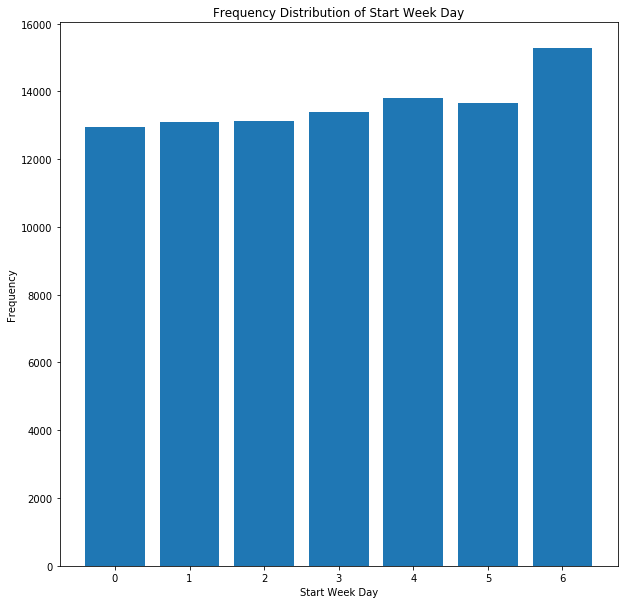

In [28]:
plt.figure(figsize=(10,10))
plt.bar(week_duration_count["start_week_day"],week_duration_count["duration"])
plt.xlabel("Start Week Day")
plt.ylabel("Frequency")
plt.xticks(week_duration_count["start_week_day"])
plt.title("Frequency Distribution of Start Week Day")
plt.show()

In [29]:
week_duration_relation = dataset[["duration","start_week_day"]].groupby(["start_week_day"]).mean().reset_index()
week_duration_relation

,start_week_day,duration
0,0,41.926839
1,1,37.252578
2,2,38.736714
3,3,41.518834
4,4,43.982034
5,5,61.983394
6,6,69.091117


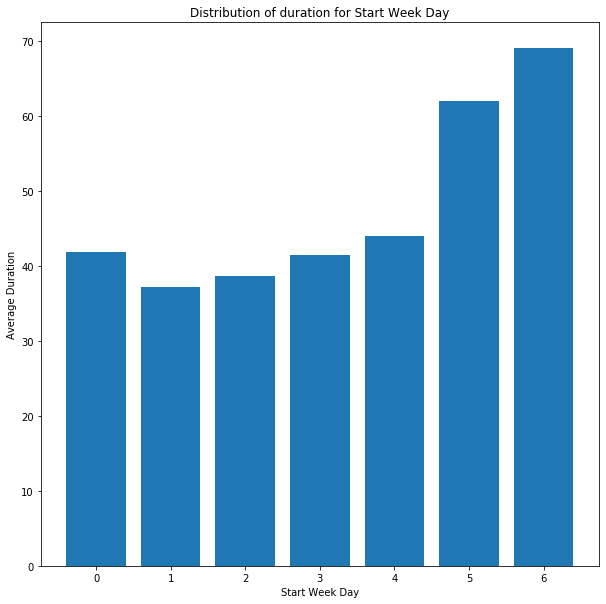

In [30]:
plt.figure(figsize=(10,10))
plt.bar(week_duration_relation["start_week_day"],week_duration_relation["duration"])
plt.xlabel("Start Week Day")
plt.ylabel("Average Duration")
plt.xticks(week_duration_relation["start_week_day"])
plt.title("Distribution of duration for Start Week Day")
plt.show()

## Calculate the total numbers of passholders of each type travelling on each week day. Discuss the results.

In [31]:
week_day = dataset["start_week_day"].unique()
passholder_type = dataset["passholder_type"].unique()


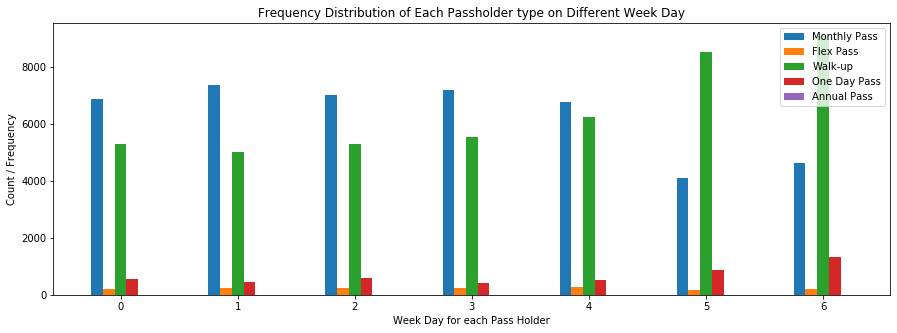

In [32]:
position = np.array([x for x in range(len(week_day))])
plt.figure(figsize=(15,5))
for i,passholder in enumerate(passholder_type):
    data = dataset[dataset["passholder_type"] == passholder]
    count = data.groupby(["start_week_day","passholder_type"]).count().reset_index()
    count["count"] = count["start_time"]
    count = count[["start_week_day","count"]]
    width = 0.10
    if len(position) != len(count):
        array = [0 for x in range(len(position))]
        for day,count in zip(count["start_week_day"],count["count"]):
            array[day] = count
            plt.bar(position + (i * width),array,width=width)
        break
    plt.bar(position + (i * width),count["count"],width=width)
plt.xlabel("Week Day for each Pass Holder")
plt.ylabel("Count / Frequency")
plt.title("Frequency Distribution of Each Passholder type on Different Week Day")
plt.xticks(position + 0.20,position)
plt.legend(passholder_type)
plt.show()